# This notebooks gives quick example of possible dataviz for analysis of the generated data

In this second notebook, you will first load the generated flow and overload data from the initial grid environment. 

You will then be able to create different dataviz that could help you in your analysis, to either calibrate thermal limits or study the level of difficulty of the environment.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-notebooks-gives-quick-example-of-possible-dataviz-for-analysis-of-the-generated-data" data-toc-modified-id="This-notebooks-gives-quick-example-of-possible-dataviz-for-analysis-of-the-generated-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This notebooks gives quick example of possible dataviz for analysis of the generated data</a></span><ul class="toc-item"><li><span><a href="#Config-parameters-for-data-generation" data-toc-modified-id="Config-parameters-for-data-generation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Config parameters for data generation</a></span></li><li><span><a href="#Load-the-environment" data-toc-modified-id="Load-the-environment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the environment</a></span></li><li><span><a href="#Load-the-generated-data" data-toc-modified-id="Load-the-generated-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load the generated data</a></span><ul class="toc-item"><li><span><a href="#Bonus:-build-specific-dataframe-on-overloads-based-on-flow-results" data-toc-modified-id="Bonus:-build-specific-dataframe-on-overloads-based-on-flow-results-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Bonus: build specific dataframe on overloads based on flow results</a></span></li></ul></li><li><span><a href="#Possible-quick-visualisations" data-toc-modified-id="Possible-quick-visualisations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Possible quick visualisations</a></span><ul class="toc-item"><li><span><a href="#Energy-mix" data-toc-modified-id="Energy-mix-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Energy mix</a></span></li><li><span><a href="#Plot-overload-depth-moustache-plot-for-each-line" data-toc-modified-id="Plot-overload-depth-moustache-plot-for-each-line-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Plot overload depth moustache plot for each line</a></span></li><li><span><a href="#Cross-table-heatmaps-to-see-where-overloads-happen" data-toc-modified-id="Cross-table-heatmaps-to-see-where-overloads-happen-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Cross table heatmaps to see where overloads happen</a></span><ul class="toc-item"><li><span><a href="#heatmap-to-see-on-which-lines-overloads-happen-for-each-agent" data-toc-modified-id="heatmap-to-see-on-which-lines-overloads-happen-for-each-agent-1.4.3.1"><span class="toc-item-num">1.4.3.1&nbsp;&nbsp;</span>heatmap to see on which lines overloads happen for each agent</a></span></li><li><span><a href="#heatmap-to-see-in-which-scenarios-overloads-happen-for-each-agent" data-toc-modified-id="heatmap-to-see-in-which-scenarios-overloads-happen-for-each-agent-1.4.3.2"><span class="toc-item-num">1.4.3.2&nbsp;&nbsp;</span>heatmap to see in which scenarios overloads happen for each agent</a></span></li><li><span><a href="#heatmap-to-see-on-which-lines-overloads-happen-with-their-duration" data-toc-modified-id="heatmap-to-see-on-which-lines-overloads-happen-with-their-duration-1.4.3.3"><span class="toc-item-num">1.4.3.3&nbsp;&nbsp;</span>heatmap to see on which lines overloads happen with their duration</a></span></li></ul></li><li><span><a href="#Density-plot-of-overload-depth-vs-duration" data-toc-modified-id="Density-plot-of-overload-depth-vs-duration-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Density plot of overload depth vs duration</a></span></li><li><span><a href="#Plots-of-occurence-of-interesting-overload-by-lines" data-toc-modified-id="Plots-of-occurence-of-interesting-overload-by-lines-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Plots of occurence of interesting overload by lines</a></span><ul class="toc-item"><li><span><a href="#For-interesting-overloads" data-toc-modified-id="For-interesting-overloads-1.4.5.1"><span class="toc-item-num">1.4.5.1&nbsp;&nbsp;</span>For interesting overloads</a></span></li><li><span><a href="#For-hard-overloads" data-toc-modified-id="For-hard-overloads-1.4.5.2"><span class="toc-item-num">1.4.5.2&nbsp;&nbsp;</span>For hard overloads</a></span></li></ul></li><li><span><a href="#Summary-dataframe-of-worst-overload-for-given-agent-and-scenario" data-toc-modified-id="Summary-dataframe-of-worst-overload-for-given-agent-and-scenario-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Summary dataframe of worst overload for given agent and scenario</a></span></li><li><span><a href="#Chronics-plot-in-scenario-around-an-overload-of-interest" data-toc-modified-id="Chronics-plot-in-scenario-around-an-overload-of-interest-1.4.7"><span class="toc-item-num">1.4.7&nbsp;&nbsp;</span>Chronics plot in scenario around an overload of interest</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import os
import re
import numpy as np
import pandas as pd
import fastparquet
import grid2op
import cufflinks as cf
from grid2op.PlotGrid import PlotMatplot
import pyarrow #necessary for saving dataframe in feather format
from grid2op.Parameters import Parameters
from grid2op.Chronics import Multifolder, GridStateFromFileWithForecasts
from lightsim2grid import LightSimBackend
from tqdm.notebook import tqdm
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#from grid2op.PlotGrid import PlotMatplot
from grid2op.PlotGrid import NUKE_COLOR, THERMAL_COLOR, HYDRO_COLOR, SOLAR_COLOR, WIND_COLOR
import matplotlib.pyplot as matplt
import seaborn as sns
%matplotlib inline

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import ipywidgets as widgets
from ipywidgets import Layout

/home/marotant/dev/l2rpn_idf_2023/venv_l2rpn_idf/lib/python3.8/site-packages/lightsim2grid/securityAnalysis.py:76: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  STR_TYPES = (str, np.str, np.str_)
/home/marotant/dev/l2rpn_idf_2023/venv_l2rpn_idf/lib/python3.8/site-packages/grid2op/Backend/PandaPowerBackend.py:31: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	/home/marotant/dev/l2rpn_idf_2023/venv_l2rpn_idf/bin/python3 -m pip install numba

  warnings.warn(


<IPython.core.display.Javascript object>

## Config parameters for data generation

In [2]:
# This cell is tagged as `parameters`
# can be used with papermill for parametrized notebook execution in cli
env_mix_name=None#"l2rpn_idf_2023_v4"#"l2rpn_neurips_2020_track2_x1"

input_folder="Inputs" #where to load some data
output_folder="Outputs" #where to save generated dataframes

#not used in this notebook, only in data generation
#n_scenarios_to_look_at=120#2#120 #number of scenarios to run
#random_seed=0
#nb_process=10 #nb of cores to use when running scenarios

action_file_name="l2rpn_wcci_actions.json" #path of file with unitary action agents to run
only_do_nothing_agent=False #if you only want to run do nothing agent, and not other unitary action agents
reduce_to_best_agent=True #only consider the best mixture of unitary action expert at each time step

env_name = "l2rpn_idf_2023_v6"#"l2rpn_neurips_2020_track2_small"#'l2rpn_idf_2023_v0'

env_root_folder="/home/marotant/data_grid2op"

if(env_mix_name):
    print("we are analyzing env "+env_name+" in mix "+env_mix_name)
else:
    print("we are analyzing env "+env_name)


we are analyzing env l2rpn_idf_2023_v6


In [3]:
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

## Load the environment

In [4]:
if env_mix_name:  
    path_chronix = f"{env_root_folder}/{env_name}/{env_mix_name}/chronics/"#f"../generation_donnees/{env_name}/chronics/"
else:
    path_chronix = f"{env_root_folder}/{env_name}/chronics/"
path_env = f"/home/marotant/data_grid2op/{env_name}"#f"../generation_donnees/{env_name}"

In [5]:
params = Parameters()
params.NO_OVERFLOW_DISCONNECTION = True
if (env_mix_name):
    env_ref = grid2op.make(path_env,
                       chronics_path=path_chronix,
                       param=params,
                       backend=LightSimBackend(),
                       chronics_class=Multifolder,
                       data_feeding_kwargs={"gridvalueClass": GridStateFromFileWithForecasts}
                       )
    env_ref_ = env_ref[env_mix_name]
else:
    env_ref=grid2op.make(path_env,
                       chronics_path=path_chronix,
                       param=params,
                       backend=LightSimBackend(),
                       data_feeding_kwargs={"gridvalueClass": GridStateFromFileWithForecasts}
                        )
    env_ref_=env_ref
#obs = env.reset()

## Load the generated data

In [7]:
#creating a fully merged dataframe from each FlowDataset_i.file
file_Format="feather"#"parquet" #"feather"


if (env_mix_name):
    env_output_folder=os.path.join(output_folder,env_mix_name)
else:
    env_output_folder=os.path.join(output_folder,env_name)
df_analysis=pd.DataFrame()

Flow_dataset_file_name="FlowDataset"

if reduce_to_best_agent:
    Flow_dataset_file_name+="_light"

if (file_Format=="parquet"):
    df_analysis_file_path=os.path.join(env_output_folder,Flow_dataset_file_name+'.parquet')
else:
    df_analysis_file_path=os.path.join(env_output_folder,Flow_dataset_file_name+'.file')

if(os.path.isfile(df_analysis_file_path)):
    print("this file already exist: "+df_analysis_file_path)
    if (file_Format=="parquet"):
        df_analysis=pd.read_parquet(df_analysis_file_path,engine = 'fastparquet')
    else:
        df_analysis=pd.read_feather(df_analysis_file_path)
else:
    print("this file does not exist "+df_analysis_file_path)
    print("maybe look for the other format or run data generation notebook first for this environment "+env_name)
    raise

df_analysis.head()

this file already exist: Outputs/l2rpn_idf_2023_v6/FlowDataset_light.file


0_1_0  0_2_1  10_11_2  69_70_3  23_71_4  70_71_5  70_72_6  69_73_7   
0  108.0  194.0    333.0    127.0    191.0    140.0     20.0    221.0  \
1  108.0  195.0    345.0    161.0    225.0    174.0     20.0    168.0   
2  107.0  199.0    395.0    140.0    204.0    153.0     20.0    215.0   
3  107.0  199.0    397.0    151.0    215.0    164.0     20.0    212.0   
4  106.0  199.0    398.0    163.0    227.0    175.0     20.0    210.0   

   69_74_8  68_74_9  73_74_10  75_76_11  68_76_12  1_11_13  74_76_14   
0    201.0    268.0     114.0      23.0     486.0    197.0     106.0  \
1    136.0    427.0     136.0       8.0     266.0    196.0     117.0   
2    192.0    282.0     112.0      23.0     504.0    195.0     106.0   
3    189.0    285.0     112.0      24.0     506.0    194.0     105.0   
4    186.0    288.0     111.0      24.0     509.0    192.0     104.0   

   76_77_15  77_78_16  76_79_17  76_79_18  78_79_19  76_81_20  81_82_21   
0     243.0      39.0      17.0       8.0      55.0     500.0     343.0  \
1     214.0      25.0      82.0      39.0      88.0     487.0     350.0   
2     234.0      29.0      19.0       9.0      65.0     505.0     360.0   
3     230.0      25.0      31.0      15.0      69.0     496.0     363.0   
4     226.0      23.0      40.0      19.0      72.0     483.0     353.0   

   82_83_22  82_84_23  2_11_24  83_84_25  84_85_26  84_87_27  84_88_28   
0     167.0     214.0    110.0     132.0     127.0     212.0      72.0  \
1     157.0     200.0    110.0     123.0     127.0     211.0      71.0   
2     148.0     187.0    111.0     114.0     127.0     210.0      70.0   
3     136.0     170.0    110.0     103.0     126.0     203.0      63.0   
4     131.0     163.0    110.0      98.0     125.0     199.0      59.0   

   87_88_29  88_89_30  88_89_31  89_90_32  88_91_33  88_91_34  6_11_35   
0     193.0     130.0     247.0     111.0      77.0      24.0    228.0  \
1     193.0     130.0     248.0     108.0      62.0      20.0    234.0   
2     192.0     130.0     248.0     106.0      52.0      17.0    251.0   
3     195.0     130.0     246.0     106.0      56.0      18.0    253.0   
4     196.0     129.0     245.0     105.0      54.0      18.0    255.0   

   90_91_36  91_92_37  91_93_38  92_93_39  93_94_40  79_95_41  81_95_42   
0     141.0     196.0     206.0     230.0     137.0     251.0      58.0  \
1     138.0     198.0     208.0     231.0     137.0     264.0      49.0   
2     136.0     193.0     202.0     226.0     136.0     257.0      51.0   
3     136.0     184.0     192.0     215.0     134.0     253.0      49.0   
4     135.0     175.0     183.0     205.0     133.0     249.0      50.0   

   93_95_43  79_96_44  79_97_45  10_12_46  79_98_47  91_99_48  93_99_49   
0     153.0     268.0     172.0     125.0     146.0     184.0     424.0  \
1     152.0     280.0     178.0     132.0     152.0     186.0     429.0   
2     145.0     273.0     172.0     122.0     146.0     183.0     429.0   
3     132.0     269.0     164.0     128.0     138.0     177.0     430.0   
4     127.0     265.0     162.0     135.0     136.0     169.0     418.0   

   94_95_50  95_96_51  97_99_52  98_99_53  99_100_54  91_101_55  100_101_56   
0     233.0     236.0     108.0      93.0      261.0      132.0       154.0  \
1     232.0     248.0     114.0     100.0      263.0      134.0       155.0   
2     226.0     242.0     108.0      94.0      260.0      131.0       153.0   
3     214.0     238.0     101.0      87.0      254.0      126.0       148.0   
4     208.0     234.0     100.0      85.0      245.0      119.0       140.0   

   11_13_57  99_102_58  99_103_59  102_103_60  102_104_61  99_105_62   
0      29.0      152.0       76.0        55.0        29.0       20.0  \
1      29.0      155.0       76.0        54.0        28.0       19.0   
2      31.0      171.0       81.0        56.0        29.0       20.0   
3      28.0      186.0       90.0        60.0        30.0       22.0   
4      30.0      191.0       92.0        61.0        

In [8]:
print(df_analysis.shape)
df_analysis.info()

(1049360, 203)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049360 entries, 0 to 1049359
Columns: 203 entries, 0_1_0 to agent
dtypes: datetime64[ns](1), float16(186), float32(9), int32(5), object(2)
memory usage: 452.3+ MB


In [9]:
if "action_before_start" in df_analysis.columns:
    df_analysis.rename(columns={'action_before_start':'agent'}, inplace=True)

#df_analysis["agent"]=df_analysis["agent"].astype("category")
    
if only_do_nothing_agent and ("agent" in df_analysis.columns):
    df_analysis=df_analysis[df_analysis.agent=="do_nothing"]
    df_analysis.reset_index(drop=True,inplace=True)

### Bonus: build specific dataframe on overloads based on flow results
in case base thermal limits already exist

In [ ]:
overload_file_name="Overloads_info_Agents"
if reduce_to_best_agent:
    overload_file_name="Overloads_info_Best_Agent"

overload_file_path=os.path.join(env_output_folder,overload_file_name+'.file')

if(os.path.isfile(overload_file_path)):
    print("loading the file from: "+overload_file_path)
    overloads_info=pd.read_feather(overload_file_path)
    if only_do_nothing_agent:
        overloads_info=overloads_info[overloads_info.agent=="do_nothing"].reset_index(drop=True)
    

else:
    print("this file does not exist "+df_analysis_file_path)
    print("please run first bis data generation notebook for this environment "+env_name)
    raise

overloads_info#.head(10)

In [11]:
print(overloads_info.shape)
overloads_info.info()

(12115, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12115 entries, 0 to 12114
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   scenarios           12115 non-null  object        
 1   agent               12115 non-null  object        
 2   start_indices       12115 non-null  int16         
 3   end_indices         12115 non-null  int16         
 4   duration            12115 non-null  int16         
 5   maxDepth_indices    12115 non-null  int16         
 6   maxDepths           12115 non-null  float16       
 7   hour_of_day         12115 non-null  int8          
 8   day_of_week         12115 non-null  int8          
 9   month               12115 non-null  int8          
 10  day_of_year         12115 non-null  int8          
 11  datetimes           12115 non-null  datetime64[ns]
 12  overload_line_name  12115 non-null  object        
dtypes: datetime64[ns](1), float16(1), 

In [12]:
if reduce_to_best_agent:
    percentage_reduced=np.round(1-overloads_info[overloads_info.agent=="best_agent"].duration.sum()/overloads_info[overloads_info.agent=="do_nothing"].duration.sum(),2)*100
    print("the percentage of overload decrease with considered actions is: "+str(percentage_reduced))

the percentage of overload decrease with considered actions is: 63.0


## Possible quick visualisations

In [13]:

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Energy mix

<AxesSubplot: >

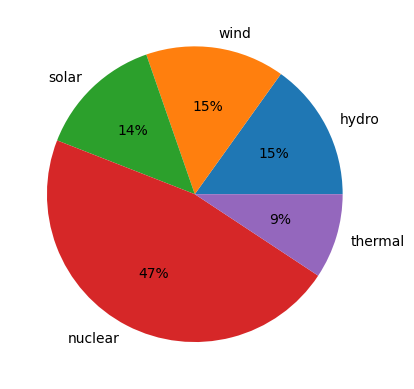

In [14]:
mix_df=df_analysis[["hydro","wind","solar","nuclear","thermal"]].astype("float32").sum()
mix_df.plot.pie(autopct='%1.0f%%')

### Plot overload depth moustache plot for each line

Text(0.5, 1.0, 'with do nothing agent')

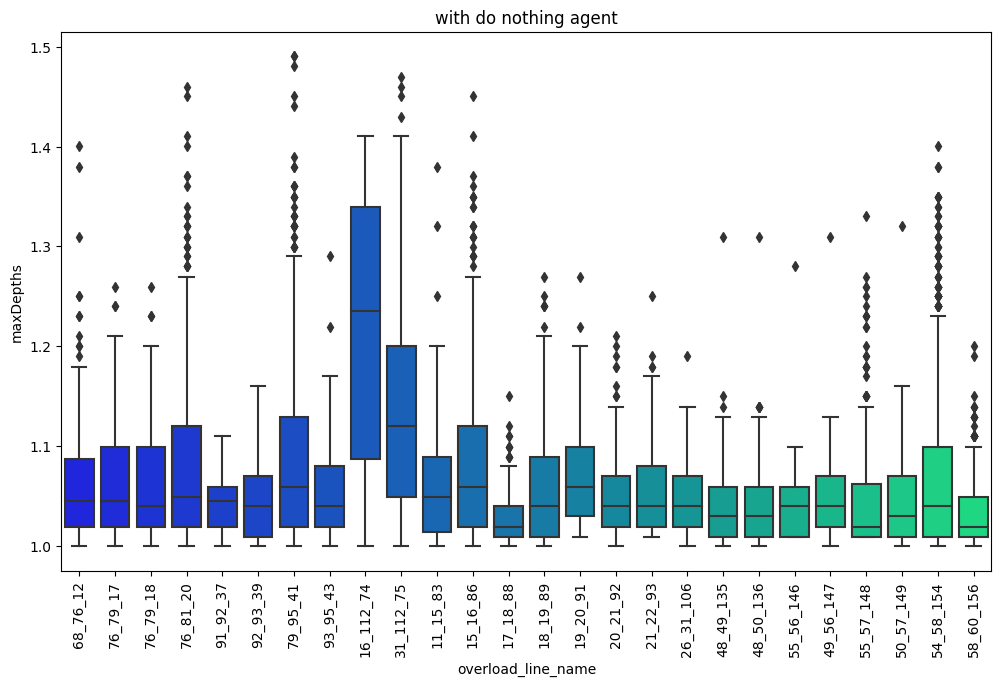

In [15]:
matplt.figure(figsize=(12, 7))
matplt.xticks(rotation=90)
sns.boxplot(x='overload_line_name', y='maxDepths', data=overloads_info[overloads_info.agent=="do_nothing"], 
            palette='winter').set_title("with do nothing agent")

#overloads_max_depth=overloads_info.maxDepths
#overloads_max_depth.index=overloads_info.overload_line_name
#overloads_info.plot(kind="box",by ="overload_line_name",column="maxDepths")

In [ ]:
if reduce_to_best_agent:
    matplt.figure(figsize=(12, 7))
    matplt.xticks(rotation=90)
    
    matplt.ylim(1, 1.5)
    sns.boxplot(x='overload_line_name', y='maxDepths', data=overloads_info[overloads_info.agent=="best_agent"], 
                palette='winter').set_title("with best agent")

### Cross table heatmaps to see where overloads happen

#### heatmap to see on which lines overloads happen for each agent

In [ ]:
table_agent_overload_name = pd.pivot_table(overloads_info, values='duration', index=['overload_line_name'],

                    columns=['agent'], aggfunc=np.count_nonzero,fill_value=0)

table_agent_overload_name.iplot(kind="heatmap")

#### heatmap to see in which scenarios overloads happen for each agent

In [ ]:
table_agent_scenario = pd.pivot_table(overloads_info, values='duration', index=['scenarios'],

                    columns=['agent'], aggfunc=np.count_nonzero,fill_value=0)

table_agent_scenario.iplot(kind="heatmap")

#### heatmap to see on which lines overloads happen with their duration

In [ ]:
table_month_line_overload = pd.pivot_table(overloads_info, values='duration', index=['overload_line_name'],

                    columns=['month'], aggfunc=np.count_nonzero,fill_value=0)

table_month_line_overload.iplot(kind="heatmap")

### Density plot of overload depth vs duration

<AxesSubplot: title={'center': 'overload duration vs depth'}, xlabel='duration', ylabel='maxDepths'>

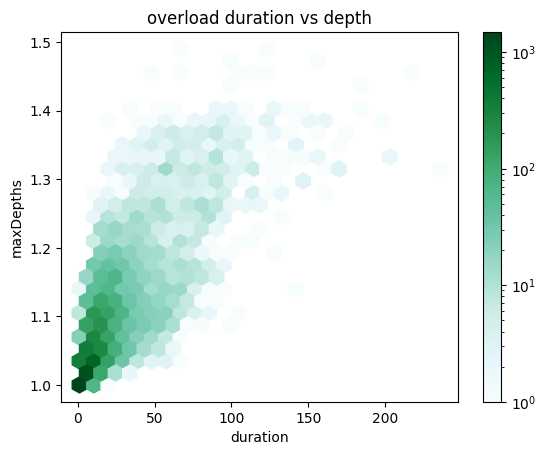

In [20]:
overloads_info[overloads_info.agent=="do_nothing"].plot.hexbin(x='duration',y='maxDepths',gridsize=25,bins='log',title="overload duration vs depth")

In [ ]:
if reduce_to_best_agent:
    overloads_info[overloads_info.agent=="best_agent"].plot.hexbin(x='duration',y='maxDepths',gridsize=25,bins='log',title="overload duration vs depth")

### Plots of occurence of interesting overload by lines

#### For interesting overloads

In [22]:

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

threshold_interesting_overload_duration=10 #10 time steps
threshold_hard_overload_duration=25



idxInteresting=((overloads_info[overloads_info.agent=="do_nothing"].duration>=threshold_interesting_overload_duration )
                    & (overloads_info[overloads_info.agent=="do_nothing"].duration<threshold_hard_overload_duration))

overloads_lines=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name[idxInteresting] 

print('bar plot for lines with intresting overloads')
pd.Series(overloads_lines).value_counts().iplot(kind='bar')

bar plot for lines with intresting overloads


/home/marotant/dev/l2rpn_idf_2023/venv_l2rpn_idf/lib/python3.8/site-packages/grid2op/PlotGrid/PlotMatplot.py:1066: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



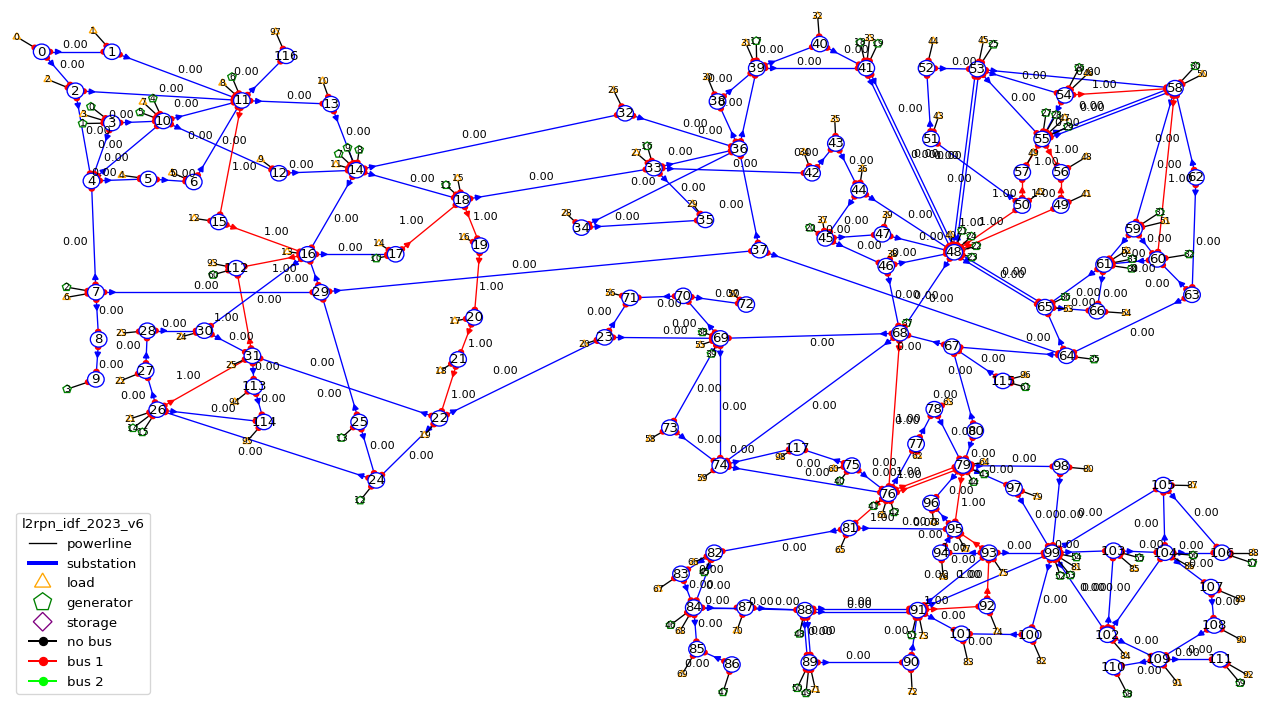

In [23]:

plot_helper = PlotMatplot(env_ref.observation_space)
n_lines=env_ref.n_line

overloads_lines_df=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name[idxInteresting].value_counts()

ids_overload_lines=[i for i in range(n_lines) for l in overloads_lines_df.index if env_ref.name_line[i]==l]

l_info = np.zeros(env_ref.n_line)
l_info[ids_overload_lines] =1.0#overloads_lines_df.values
_ = plot_helper.plot_info(line_values=l_info, coloring="line")

In [ ]:
if reduce_to_best_agent:
    idxInteresting=((overloads_info[overloads_info.agent=="best_agent"].duration>=threshold_interesting_overload_duration )
                        & (overloads_info[overloads_info.agent=="best_agent"].duration<threshold_hard_overload_duration))

    overloads_lines=overloads_info[overloads_info.agent=="best_agent"].overload_line_name[idxInteresting] 

    print('bar plot for lines with intresting overloads')
    pd.Series(overloads_lines).value_counts().iplot(kind='bar')

In [ ]:
if reduce_to_best_agent:
    plot_helper = PlotMatplot(env_ref.observation_space)
    n_lines=env_ref.n_line

    overloads_lines_df=overloads_info[overloads_info.agent=="best_agent"].overload_line_name[idxInteresting].value_counts()

    ids_overload_lines=[i for i in range(n_lines) for l in overloads_lines_df.index if env_ref.name_line[i]==l]

    l_info = np.zeros(env_ref.n_line)
    l_info[ids_overload_lines] =1.0#overloads_lines_df.values
    _ = plot_helper.plot_info(line_values=l_info, coloring="line")

#### For hard overloads

In [ ]:
idxHard=(overloads_info[overloads_info.agent=="do_nothing"].duration>=threshold_hard_overload_duration)

overloads_lines=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name[idxHard] 

print('bar plot for lines with hard overloads')
pd.Series(overloads_lines).value_counts().iplot(kind='bar')

In [ ]:
overloads_lines_df=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name[idxHard].value_counts()
ids_overload_lines=[i for i in range(n_lines) for l in overloads_lines_df.index if env_ref.name_line[i]==l]

l_info = np.zeros(env_ref.n_line)
l_info[ids_overload_lines] =1.0#overloads_lines_df.values
_ = plot_helper.plot_info(line_values=l_info, coloring="line")

In [ ]:
if reduce_to_best_agent:
    idxHard=(overloads_info[overloads_info.agent=="best_agent"].duration>=threshold_hard_overload_duration)

    overloads_lines=overloads_info[overloads_info.agent=="best_agent"].overload_line_name[idxHard] 

    print('bar plot for lines with hard overloads')
    pd.Series(overloads_lines).value_counts().iplot(kind='bar')

In [ ]:
if reduce_to_best_agent:
    overloads_lines_df=overloads_info[overloads_info.agent=="best_agent"].overload_line_name[idxHard].value_counts()
    ids_overload_lines=[i for i in range(n_lines) for l in overloads_lines_df.index if env_ref.name_line[i]==l]

    l_info = np.zeros(env_ref.n_line)
    l_info[ids_overload_lines] =1.0#overloads_lines_df.values
    _ = plot_helper.plot_info(line_values=l_info, coloring="line")

### Summary dataframe of worst overload for given agent and scenario

In [ ]:
agent_names=list(df_analysis.agent.unique())
print("possible agents are: "+str(agent_names))

In [ ]:
possiblyOverloadedLines=(overloads_info.overload_line_name).unique()

In [ ]:
#create a summary dataframe of worse overload in terms of duration for given agent and scenario
from IPython.display import display
from utils.Create_Run_Dataframe import MakeSummaryOverload_Scenario 
def plot_overload_summary_scenario(scenario,agent):
    #Scenario=Scenario_choose.value#"Scenario_december_08"
    #print(agent)
    possiblyOverloadedLines=(overloads_info.overload_line_name).unique()
    #print("possiblyOverloadedLines")
    #print(possiblyOverloadedLines)


    summary_overloads_scenario_df=MakeSummaryOverload_Scenario(scenario,agent,overloads_info,possiblyOverloadedLines)
    #print(summary_overloads_scenario_df.head(10))
    display(summary_overloads_scenario_df)
#summary_overloads_scenario_df

In [ ]:
overloads_info

In [ ]:
Scenario_widget=widgets.Dropdown(
    options=overloads_info["scenarios"].unique().tolist(),
    value=overloads_info["scenarios"][0],
    description='Name:',
    disabled=False,
)
Agent_widget=widgets.Dropdown(
    options=agent_names,
    value=agent_names[0],
    description='Name:',
    disabled=False,
)

#summary_overloads_scenario_df=widgets.interactive(MakeSummaryOverload_Scenario,ScenarioName=Scenario_widget,agent=Agent_widget,
#                                                  overloads_info=overloads_info,possiblyOverloadedLines=possiblyOverloadedLines)

overload_scenario_view=widgets.interactive(plot_overload_summary_scenario, scenario=Scenario_widget,agent=Agent_widget)
Scenario_widget.observe(lambda x: overload_scenario_view.update(), 'value')
Agent_widget.observe(lambda x: overload_scenario_view.update(), 'value')
overload_scenario_view

### Chronics plot in scenario around an overload of interest

In [45]:
Overload_id_widget=widgets.Dropdown(
    options=MakeSummaryOverload_Scenario(Scenario_widget.value,Agent_widget.value,overloads_info,possiblyOverloadedLines).index,
    value=0,
    description='Number:',
    disabled=False,
)
#Overload_id_widget

In [46]:
def plot_scenario_window(scenario,row_id_overload_in_df,agent):

    #row_id_overload_in_df=0
    time_window=72 #4heures

    #scenario=summary_overloads_scenario_df.scenarios[row_id_overload_in_df]
    #agent=summary_overloads_scenario_df.agent[row_id_overload_in_df]
    summary_overloads_scenario_df=MakeSummaryOverload_Scenario(scenario,agent,overloads_info,possiblyOverloadedLines)
    
    max_iter=df_analysis[(df_analysis.scenario==scenario)&(df_analysis.agent==agent)].shape[0]-1
    overload_duration=summary_overloads_scenario_df.duration[row_id_overload_in_df]
    t_start_overload=summary_overloads_scenario_df.start_indices[row_id_overload_in_df]
    start_id=max(0,t_start_overload-time_window/2)
    end_id=min(start_id+time_window,max_iter)
    
    max_D_indice=overloads_info.maxDepth_indices
    timesteps_overloads=list(max_D_indice[(overloads_info.scenarios==scenario)&(max_D_indice>=start_id) &(max_D_indice<=end_id) ])
    #####plot
    df_Scenario=df_analysis[['hydro','thermal','wind','solar','nuclear','load']][(df_analysis.scenario==scenario)&(df_analysis.agent==agent)].reset_index(drop=True)
    df_Scenario_time_window=df_Scenario[(df_Scenario.index>=start_id) & (df_Scenario.index<=end_id)]

    #print("visualizing overloads in scenario "+scenario+" for agent "+agent+" around timestep "+str(t_start_overload))
    title=scenario+" for agent "+agent+" around timestep "+str(t_start_overload)
    #display(df_Scenario_time_window.astype("float32").iplot(asFigure=True,title=title , vline=timesteps_overloads))
    display(df_Scenario_time_window.astype("float32").iplot(asFigure=True,title=title , vline=timesteps_overloads))

In [48]:
plot_scenario_window_view=widgets.interactive(plot_scenario_window, scenario=Scenario_widget, row_id_overload_in_df=Overload_id_widget,agent=Agent_widget)
#Scenario_widget.observe(lambda x: plot_scenario_window_view.update(), 'value')
Overload_id_widget.observe(lambda x: plot_scenario_window_view.update(), 'value')

plot_scenario_window_view

interactive(children=(Dropdown(description='Name:', options=('2035-01-01_1', '2035-01-01_2', '2035-01-08_0', '…